In [ ]:
from collections import defaultdict
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
class NaiveBayesClassifier(object):
    def fit(self, X, y, epsilon=1e-10):
        self.y_classes, y_counts = np.unique(y, return_counts=True)
        self.x_classes = np.array([np.unique(x) for x in X.T], dtype=object)
        self.u = np.array([X[y == k].mean(axis=0) for k in self.y_classes]) #матожидания для каждого класса
        self.var_x = np.array([X[y == k].var(axis=0) + epsilon for k in self.y_classes]) #дисперсия для каждого класса
        return self

    def predict(self, X):
        return np.apply_along_axis(lambda x: self.compute_probs(x), 1, X)

    def compute_probs(self, x):
        probs = np.array([self.compute_prob(x, y) for y in range(len(self.y_classes))]) #условная вероятность встречи признака для каждого класса
        return self.y_classes[np.argmax(probs)]

    def compute_prob(self, x, y):
        c = 1.0 / np.sqrt(2.0 * np.pi * np.square(self.var_x[y]))
        return np.prod(c * np.exp(-1.0 * np.square(x - self.u[y]) / (2.0 * np.square(self.var_x[y])))) #формула распределения вероятности тут походу косяк

    def evaluate(self, X, y):
        return (self.predict(X) == y).mean()

In [ ]:
N = 220
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([4, 4])
cloud2 = noise + np.array([5, 7])
cloud3 = noise + np.array([6, 9])
data = np.vstack([cloud1, cloud2, cloud3])

In [ ]:
annotation1 = [0]*N
annotation2 = [1]*N
annotation3 = [2]*N
annotations = annotation1 + annotation2 + annotation3

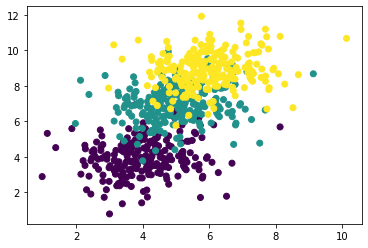

In [ ]:
plt.scatter(data[:,0], data[:,1], c=annotations)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

In [ ]:
Xtrain.shape, Xtest.shape

((495, 2), (165, 2))

In [ ]:
len(Ytrain), len(Ytest)

(495, 165)

In [ ]:
def evaluate(P, T):
    # P - predictions
    # T - targets
    # accuracy = correct predictions / all predictions
    # ---
    # P - предсказания
    # T - метки
    # точность = (количество корректных предсказаний) / (количество всех предсказаний)
    accuracy = np.mean(P == T)
    return accuracy

1) Сравнение классфифкаторов

In [ ]:
classifers_info = []
for model in [NaiveBayesClassifier(), GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]:
  model.fit(Xtrain, Ytrain)
  pred = model.predict(Xtest)
  conf_mat = confusion_matrix(Ytest, pred)
  print(type(model).__name__ + "\n", conf_mat)
  accuracy = evaluate(model.predict(Xtest), Ytest)
  print(accuracy*100, '%')
  #подсчет времени на классификацию по одному
  arr = []
  for i in range(len(Xtest) - 1):
    start_time = time.time()
    model.predict(Xtest[i:i + 1])
    end_time = time.time()
    arr.append(end_time - start_time)
  #sns.heatmap(conf_mat, annot=True)
  classifers_info.append((type(model).__name__, accuracy, arr[0], np.var(arr),conf_mat))

print(classifers_info)

NaiveBayesClassifier
 [[55  5  0]
 [ 3 47  7]
 [ 0  6 42]]
87.27272727272727 %
GaussianNB
 [[55  5  0]
 [ 3 47  7]
 [ 0  6 42]]
87.27272727272727 %
MultinomialNB
 [[33  0 27]
 [12  0 45]
 [ 7  1 40]]
44.24242424242424 %
ComplementNB
 [[47  0 13]
 [22  0 35]
 [15  0 33]]
48.484848484848484 %
BernoulliNB
 [[ 0  0 60]
 [ 0  0 57]
 [ 0  0 48]]
29.09090909090909 %
[('NaiveBayesClassifier', 0.8727272727272727, 0.0002455711364746094, 1.2920265163918494e-08, array([[55,  5,  0],
       [ 3, 47,  7],
       [ 0,  6, 42]])), ('GaussianNB', 0.8727272727272727, 0.000274658203125, 1.1532414872357732e-08, array([[55,  5,  0],
       [ 3, 47,  7],
       [ 0,  6, 42]])), ('MultinomialNB', 0.44242424242424244, 0.0001690387725830078, 2.2935686108617093e-10, array([[33,  0, 27],
       [12,  0, 45],
       [ 7,  1, 40]])), ('ComplementNB', 0.48484848484848486, 0.00010561943054199219, 4.573238523944778e-10, array([[47,  0, 13],
       [22,  0, 35],
       [15,  0, 33]])), ('BernoulliNB', 0.29090909090909

2) Классификатор наиболее точный

In [ ]:
max(classifers_info, key = lambda x: x[1])[0]

'NaiveBayesClassifier'

3) Гистограммы производительности классификаторов

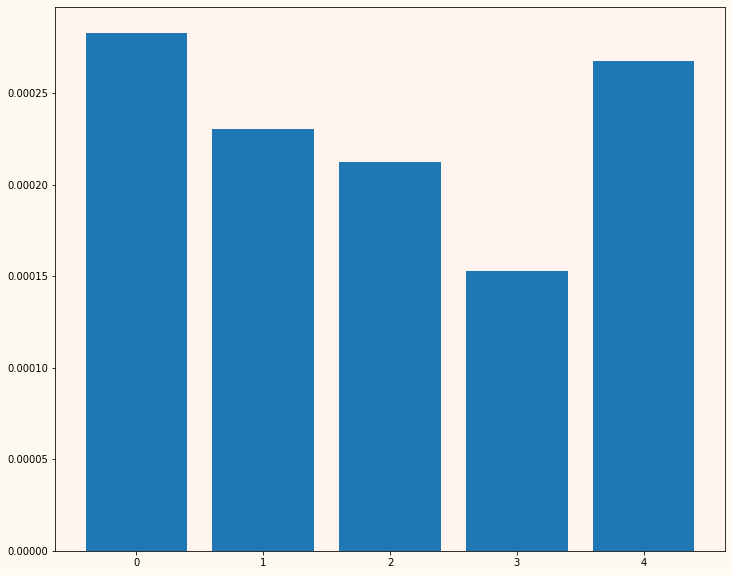

In [ ]:
x = np.arange(0, len(classifers_info))
y = [n[2] for n in classifers_info]

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(10)

plt.show()

4) наиболее стабильный классификатор

In [ ]:
min(classifers_info, key = lambda x: x[3])[0]

'MultinomialNB'